# Section 3: Visualisation de données

Le cerveau humain excelle à trouver des modèles dans les représentations visuelles des données.   
Dans cette section, nous allons apprendre à visualiser les données en utilisant pandas avec les bibliothèques `Matplotlib`et `Seaborn` . Nous créerons diverses visualisations qui nous aideront à mieux comprendre nos données.

# <font color='Red'>I) Visualisation avec pandas</font> 

Nous pouvons créer une variété de visualisations en utilisant la méthode `plot()`. Dans cette section, nous allons faire un bref tour de cette fonction qui utilise `Matplotlib`

Cette fois aussi, nous travaillerons avec les données de débit des voyageurs (`TSA traveler`) que nous avons nettoyées dans la section précédente :

In [2]:
import pandas as pd

tsa_melted_holiday_travel = pd.read_csv(
    '../datasets/tsa_melted_holiday_travel.csv', 
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


Pour intégrer des graphiques au format ***SVG*** dans le notebook, nous appellons `%config` and `%matplotlib inline` :

In [4]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline 

## <font color='green'> I-a) Les courbes (Line plots)</font> 

La méthode `plot()` générera des courbes pour toutes les colonnes numériques par défaut :

<Axes: title={'center': '2020 TSA Traveler Throughput'}, xlabel='date', ylabel='travelers'>

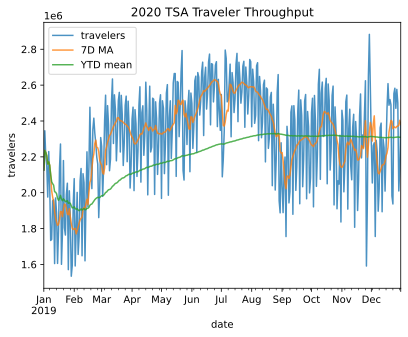

In [14]:
tsa_melted_holiday_travel.drop(columns='year').loc['2019'].assign(
    **{
        '7D MA'   : lambda x: x.travelers.rolling('7D').mean(),
        'YTD mean': lambda x: x.travelers.expanding().mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)

La méthode `plot()` renvoie un objet `Axes` qui peut être modifié (par exemple pour ajouter des annotations, des étiquettes, etc.). Voyons un exemple.

## <font color='green'> I-b) diagrammes en barres/Bar plots</font> 

Pour notre prochain exemple, nous allons tracer des barres verticales pour comparer le débit mensuel des voyageurs TSA sur plusieurs années. Commençons par créer un tableau croisé dynamique avec les informations dont nous avons besoin :

<Axes: title={'center': 'TSA Traveler Throughput by Year'}, xlabel='month', ylabel='travelers'>

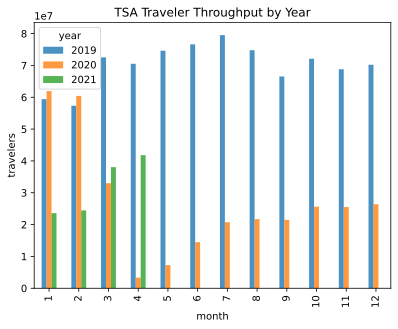

In [ ]:
plot_data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')
plot_data.head()


Pandas offre d’autres types de graphiques via le paramètre `kind`, donc on spécifie `kind='bar'` en appelant la méthode `plot()`. Ensuite, nous formaterons la visualisation en utilisant l’objet `Axes` retourné par la méthode plot().   
 Voir les paramettres de `plot()`[ici](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#)

In [ ]:
import calendar
from matplotlib import ticker

ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='travelers',
    figsize=(8, 1.5), title='TSA Monthly Traveler Throughput'
)

# use month abbreviations for the ticks on the x-axis
ax.set_xticklabels(calendar.month_abbr[1:])

# show y-axis labels in millions instead of scientific notation
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.5), ncol=3, frameon=False)

Quelques informations à garder à l’esprit :
- Le module `ticker` de `Matplotlib` fournit des fonctionnalités pour personnaliser à la fois les étiquettes leures emplacements; consultez la [documentation](https://matplotlib.org/stable/api/ticker_api.html) pour plus d'informations.
- **Pandas** supporte aussi les barres ***horizontales*** et ***empilées***; [Ici](https://medium.com/@stefaniemolin/how-to-pivot-and-plot-data-with-pandas-9450939fcf8) un blog qui montre comment faire des barres horizontales empilées à l’aide d’un tableau croisé dynamique.
- La fonction `plot()` comprend plusieurs [paramèters](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

## <font color='green'> I-c) diagrammes de distributions/Plotting distributions</font> 

Comparons maintenant la répartition du débit quotidien des voyageurs TSA sur plusieurs années. Nous allons créer un diagramme et une courbe de distribution pour chaque année.  
 Dans les deux exemples précédents, Pandas a généré les objets `Figure` et `Axes`, mais nous pouvons construire des mises en page personnalisées en les créant nous-mêmes avec `Matplotlib` en utilisant la fonction `plt.subplots()`. Tout d’abord, il faudra importer le module `pyplot` :

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
# define the subplot layout
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 4))

for year, ax in zip(tsa_melted_holiday_travel.year.unique(), axes):
    plot_data = tsa_melted_holiday_travel.loc[str(year)].travelers
    plot_data.plot(kind='hist', legend=False, density=True, alpha=0.8, ax=ax)
    plot_data.plot(kind='kde', legend=False, color='blue', ax=ax)
    ax.set(title=f'{year} TSA Traveler Throughput', xlabel='travelers')

fig.tight_layout() # handle overlaps

*Conseil : Pour découvrir la fonction « zip() », jetez un coup d’œil [ici](https://realpython.com/python-zip-function/).*

## <font color='green'> I-d) Exercise 3.1</font> 

##### À l’aide des données sur le débit des voyageurs `tsa_melted_holiday_travel.csv`, créez des graphiques en boîtes à moustache pour le débit des voyageurs pour chaque année dans les données.  
 *Astuce : Passez `kind='box`dans la méthode `plot()` pour générer des parcelles.*

# <font color='Red'>II) Visualisation avec le module ***Seaborn***</font> 

La bibliothèque ***`Seaborn`*** permet de visualiser facilement les données long-format sans avoir à les pivoter. 
En outre, elle offre également quelques types de visualisation supplémentaires. Ici vous allez traiter quelques exemples de visualisations avec `Seaborn`.

## <font color='green'> II-a) Visualisation des données long-format</font> 

Avec Seaborn, nous pouvons spécifier les couleurs des graphiques en fonction des valeurs d’une colonne avec le paramètre `hue`. Lorsque nous travaillons avec des sous-graphes, nous pouvons également spécifier comment diviser les sous-graphes avec les paramètres `col` et `row`. Ici, nous revisitons la comparaison de la distribution du débit de voyageurs TSA sur plusieurs années :

In [ ]:
import seaborn as sns

sns.displot(
    data=tsa_melted_holiday_travel, x='travelers', col='year', kde=True, height=2.5
)

## <font color='green'> II-b) Les cartes thermiques/Heatmaps</font> 

Nous pouvons également utiliser `Seaborn` pour visualiser des tableaux croisés dynamiques sous forme de cartes thermiques :

In [ ]:
tsa_melted_holiday_travel.head()

In [ ]:
data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')

ax = sns.heatmap(data=data / 1e6, cmap='Blues', annot=True, fmt='.1f')
_ = ax.set_yticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_title('Total TSA Traveler Throughput (in millions)')

*Conseil : Consultez la documentation de Matplotlib pour plus d’informations sur [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) et [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html).*

Nous passons de ***Seaborn*** maintenant, mais il y a beaucoup plus disponible dans [API](https://seaborn.pydata.org/api.html). Essayer de consulter les liens suivant:
- [pairwise plots](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) avec `pairplot()`
- [categorical scatter plots](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) avec `swarmplot()`
- [joint distribution plots](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) avec `jointplot()`
- [FacetGrids](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) pour des mises en page personnalisées avec n’importe quel type de visualisation

## <font color='green'> II-c) Exercise 3.2</font> 

##### En utilisant les données de débit des voyageurs TSA dans le fichier`tsa_melted_holiday_travel.csv` , créer une carte thermique qui montre le débit ***médian*** de voyageurs de la TSA en ***2019*** par ****jour*** de semaine et par ***mois***.

# <font color='Red'>III) Personnalisation des graphes avec module ***Matplotlib***</font> 

Dans cette dernière section, nous verrons comment utiliser ***Matplotlib*** pour personnaliser les graphiques. Comme il y a beaucoup de fonctionnalités disponibles, nous verrons seulement comment ajouter des zones grisées et des annotations ici, mais n'hésiter pas de consulter la [documentation](https://matplotlib.org/) pour plus de fonctionnalités.

## <font color='green'> III-a) Ajout de zones grisées </font> 

Lorsque vous regardez une visualisation du débit des voyageurs au fil du temps, il est utile d’indiquer les périodes pendant lesquelles il y avait des voyages en vacances. Pour ce faire, nous pouvons nous servir de la méthode `axvspan()`:

In [ ]:
plot_data = tsa_melted_holiday_travel['2019-05':'2019-11']
ax = plot_data.travelers.plot(
    title='TSA Traveler Throughput', ylabel='travelers', figsize=(9, 2)
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# collect the holiday ranges (start and end dates)
holiday_ranges = plot_data.dropna().reset_index()\
    .groupby('holiday').agg({'date': ['min', 'max']})

# create shaded regions for each holiday in the plot
for start_date, end_date in holiday_ranges.to_numpy():
    ax.axvspan(start_date, end_date, color='gray', alpha=0.2)

*Conseil : Utilisez `axhspan()` pour les régions ombrées horizontalement et `axvline()` / `axhline()` pour les lignes de référence verticales/horizontales.*

## <font color='green'> III-b) ajouter des annotations </font> 

Nous pouvons utiliser la méthode `annotate()` pour ajouter des annotations au graphique. Ici, nous soulignons le jour de 2019 avec le plus haut débit de voyageurs TSA, qui était le lendemain du *Thanksgiving*:

In [ ]:
plot_data = tsa_melted_holiday_travel.loc['2019']
ax = plot_data.travelers.plot(
    title='TSA Traveler Throughput', ylabel='travelers', figsize=(9, 2)
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# highest throughput
max_throughput_date = plot_data.travelers.idxmax()
max_throughput = plot_data.travelers.max()
_ = ax.annotate(
    f'{max_throughput_date:%b %d}\n({max_throughput / 1e6:.2f} M)',
    xy=(max_throughput_date, max_throughput),
    xytext=(max_throughput_date - pd.Timedelta(days=25), max_throughput * 0.92),
    arrowprops={'arrowstyle': '->'}, ha='center'
)

Des informations à garder dans l'ésprit: 
- Nous avons utilisé les méthodes `Axes` pour personnaliser nos graphiques (c.-à-d. **une approche orientée objet**), et nous avons aussi vu le module **`pyplot`** qui permet des fonctions équivalentes (c.-à-d. **une approche fonctionnelle**) pour ajouter des régions ombrées, des lignes de référence, des annotations, etc (p. ex.,  `Axes.set_xlabel()` contre `plt.xlabel()`). 
- En général, essayez de vous en tenir à l’approche orientée objet ou fonctionnelle plutôt que de mélanger les deux. Cependant, soyez prudent lorsque vous travaillez avec des sous-graphes;  les functions `pyplot` affecteront seulement le dernier sous-graphe.
- Le diagramme [anatomie d’une figure](https://matplotlib.org/stable/gallery/showcase/anatomy.html) dans la documentation de Matplotlib est une excellente ressource pour identifier les objets auxquels vous aurez besoin d’accéder pour personnaliser les graphiques.

For more on data visualization in Python, including animations and interactive plots, check out my [Beyond the Basics: Data Visualization in Python](https://github.com/stefmolin/python-data-viz-workshop) workshop.

## <font color='green'> III-c) Exercise 3.3 </font> 

##### Annoter les médianes dans la zone du graphique de l'*Exercise 3.1*. 
Conseil : Les coordonnées ***x*** seront 1, 2 et 3 pour 2019, 2020 et 2021, respectivement. 
Sinon, vous pouvez utiliser la méthode `Axes.get_xticklabels()`, auquel cas vous devriez regarder la [documentation](https://matplotlib.org/stable/api/text_api.html) pour la class `Text`.